**HackerEarth Machine Learning challenge:Calculate the severity of an airplane accident**

In [0]:
#importing required python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
#reading train set

train_set = pd.read_csv("train.csv")

In [4]:
train_set.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
train_set.shape

(10000, 12)

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64


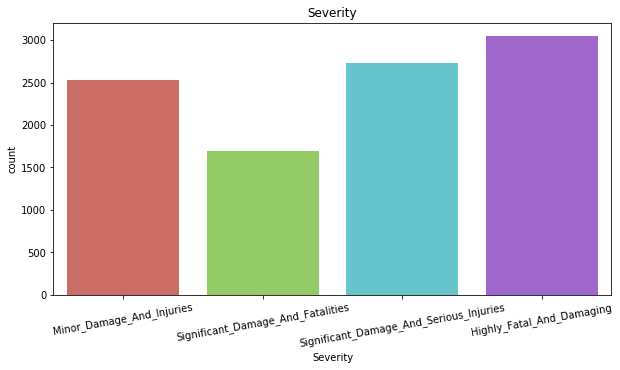

In [14]:
#count plot for different Severity

import seaborn as sns
print(train_set.Severity.value_counts())

plt.figure(figsize=(10,5))
fig = sns.countplot(x=train_set['Severity'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=10)
plt.title('Severity')
plt.show(fig)

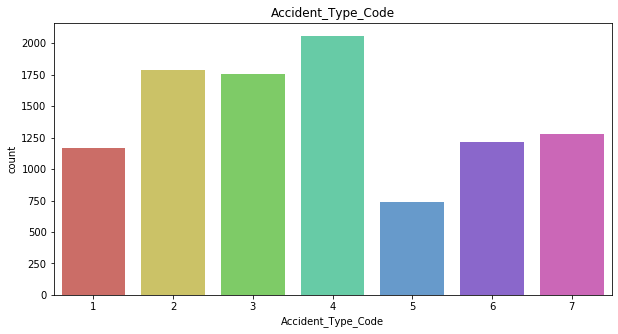

In [15]:
#Accident_Type_Code count plot

plt.figure(figsize=(10,5))
fig = sns.countplot(x=train_set['Accident_Type_Code'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels())
plt.title('Accident_Type_Code')
plt.show(fig)

In [0]:
#we dont require Accident_ID for training our model so we can drop this column

train_set = train_set.drop(['Accident_ID'], axis=1)

In [17]:
train_set.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [18]:
train_set.shape

(10000, 11)

In [20]:
#different types of Severity classes available

print(train_set['Severity'].unique())

['Minor_Damage_And_Injuries' 'Significant_Damage_And_Fatalities'
 'Significant_Damage_And_Serious_Injuries' 'Highly_Fatal_And_Damaging']


In [0]:
#giving a numerical class value to each severity class

class_to_num = {'Minor_Damage_And_Injuries': 0, 'Significant_Damage_And_Fatalities': 1, 'Significant_Damage_And_Serious_Injuries': 2, 'Highly_Fatal_And_Damaging': 3}

In [22]:
#Transforming Severity class to numerical value

train_set.Severity = [class_to_num[item] for item in train_set.Severity]
train_set.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,0,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,1,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,1,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [24]:
#Data types of values present in each columns and if null or non-null values
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
Severity                   10000 non-null int64
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
dtypes: float64(6), int64(5)
memory usage: 859.5 KB


In [0]:
#Dividing dataset columns into Independent features and Dependent/Target feature
#x denotes the Independent feature columns and y denotes the Dependent/Target feature column.

x = train_set.drop('Severity', axis=1)
y = train_set['Severity']

In [0]:
from sklearn import preprocessing
X = preprocessing.scale(x)

In [0]:
#we shall seperate our training set into train and validation set

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=0)

**Machine Learning Algorithm- Support Vector Machine for Classification**

In [43]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

svm_pred = svm_classifier.predict(X_validate)
print(accuracy_score(y_validate, svm_pred))

0.875


**Accuracy and f1 score on Train set**

In [49]:
from sklearn.metrics import f1_score

print("SVMClassifier Accuracy: {}%".format(accuracy_score(y_validate, svm_pred)*100.0))
print("SVMclassifier f1_score: ", f1_score(y_validate, svm_pred, average='weighted'))

SVMClassifier Accuracy: 90.75%
SVMclassifier f1_score:  0.9077453064557433


In [0]:
#training the classifier with complete train set

svm_classifier = SVC()
svm_classifier.fit(X,y)


**Making predictions on Test set and submiting results**

In [50]:
#test set predictions and submition

test_set = pd.read_csv('test.csv')

test_set.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [0]:
ID = test_set['Accident_ID']

In [0]:
test = test_set.drop(['Accident_ID'], axis=1)

test = preprocessing.scale(test)

In [0]:
predictions = svm_classifier.predict(test)

In [0]:
num_to_class = {0: 'Minor_Damage_And_Injuries', 1: 'Significant_Damage_And_Fatalities', 2: 'Significant_Damage_And_Serious_Injuries', 3: 'Highly_Fatal_And_Damaging'}

In [0]:
predictions = [num_to_class[item] for item in predictions]

**Saving predictions in a csv file for submition**

In [0]:
#save results
result = pd.DataFrame({'Accident_ID': ID, 'Severity': predictions})
result.to_csv('predictions.csv', index=False)

In [70]:
open_pred = pd.read_csv('predictions.csv')
open_pred

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Highly_Fatal_And_Damaging
...,...,...
2495,12484,Highly_Fatal_And_Damaging
2496,12487,Significant_Damage_And_Serious_Injuries
2497,12488,Significant_Damage_And_Serious_Injuries
2498,12491,Significant_Damage_And_Serious_Injuries


**<--------------------------------------END--------------------------------->**